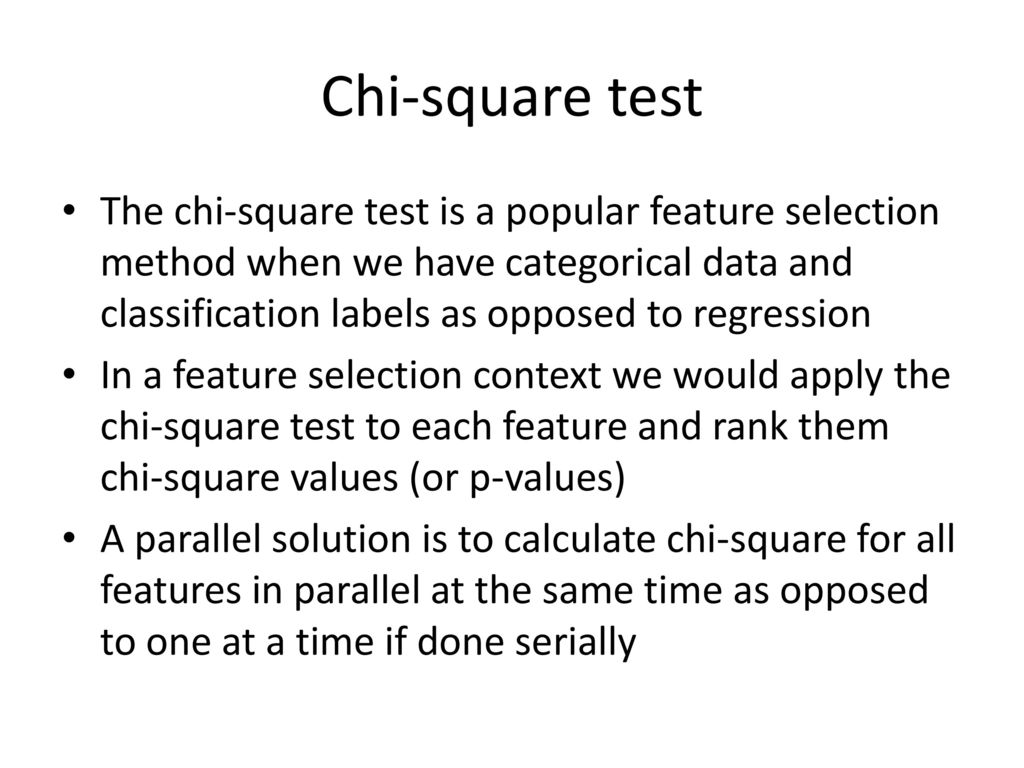

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/arjun0200/Datasets/main/games.csv")

In [5]:
df.head()

,Day,Outlook,Wind,Humidity,Playtennis
0,1,Sunny,Weak,High,No
1,2,Sunny,Strong,High,No
2,3,Overcast,Weak,Normal,Yes
3,4,Rain,Weak,Normal,Yes
4,5,Rain,Weak,High,Yes


### Using LabelEncoder to convert all object values into numbers

In [9]:
df_object = df.select_dtypes(include = 'object').columns
print(df_object)

Index(['Outlook', 'Wind', 'Humidity', 'Playtennis'], dtype='object')


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


for i in df_object:
    df[i] = le.fit_transform(df[i])

In [12]:
df.head(1)

,Day,Outlook,Wind,Humidity,Playtennis
0,1,2,1,0,0


# Importing Chi2 Test

In [14]:
from sklearn.feature_selection import chi2

x = df.drop('Playtennis', axis = 1)
y = df['Playtennis']

chi_scores = chi2(x, y)
chi_scores

(array([0.62222222, 1.8       , 0.09375   , 2.13333333]),
 array([0.43022269, 0.17971249, 0.75946287, 0.14412703]))

### From above we can find that array first gives the chi square values and second array gives the P_values of the dataset 

In [17]:
p_values = pd.Series(chi_scores[1], index = x.columns)
p_values.sort_values(ascending = False, inplace = True)
print(p_values)

Wind        0.759463
Day         0.430223
Outlook     0.179712
Humidity    0.144127
dtype: float64


### Since Wind dataset columns has higher p_value, it says that this variable is independent of the response (Playtennis) i.e target variable hence cannot be considered for model training.

# One more example of Chi square text


### Chi square feature selection in python using titanic dataset

Hypothesis testing

Lets
H0 - Two variables (embarked and survived) are independent--(both are categorical variables)

H1 - Two variables are dependent on each other

In [19]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/arjun0200/Datasets/main/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [66]:
x = df['Embarked']
y = df['Survived']

dfobserved = pd.crosstab(y, x)
dfobserved

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [67]:
chi2, p, dof, expected = stats.chi2_contingency(dfobserved)
print('chi2=', chi2, 'p_value=',p , 'dof=', dof, 'expected=', expected)

chi2= 26.48914983923762 p_value= 1.769922284120912e-06 dof= 2 expected= [[103.7480315  47.5511811 397.7007874]
 [ 64.2519685  29.4488189 246.2992126]]


In [68]:
p

1.769922284120912e-06

### Checking for all columns

In [69]:
def Testingindependent(colx, coly, alpha = 0.05):
    x = df[colx]
    y = df[coly]
    
    dfobserved = pd.crosstab(y, x)

    chi2, p, dof, expected = stats.chi2_contingency(dfobserved)
    #dfexpected = pd.DataFrame(expected, columns = dfobserved.columns, index = dfobserved.index)


    if p < alpha:
        result = '{0} is important for prediction'.format(colx)
    else:
        result = '{0} is not an important predictor.(Discard {0} from model)'.format(colx)
        
    print(result)

In [70]:
testcolumns = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [71]:
for var in testcolumns:
    Testingindependent(colx = var, coly = 'Survived')

PassengerId is not an important predictor.(Discard PassengerId from model)
Pclass is important for prediction
Name is not an important predictor.(Discard Name from model)
Sex is important for prediction
Age is not an important predictor.(Discard Age from model)
SibSp is important for prediction
Parch is important for prediction
Ticket is important for prediction
Fare is important for prediction
Cabin is not an important predictor.(Discard Cabin from model)
Embarked is important for prediction
